<a href="https://colab.research.google.com/github/llgithub97/INSE6220/blob/main/Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


Dataset Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1.) Area: Gives the number of pixels within the boundaries of the raisin.
2.) Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3.) MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4.) MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5.) Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6.) ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7.) Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8.) Class: Kecimen and Besni raisin.

Relevant Papers:

CINAR I., KOKLU M. and TASDEMIR S., (2020), Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods. Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020. DOI

Citation Request:

CINAR I., KOKLU M. and TASDEMIR S., (2020), Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods. Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020. DOI

Source: https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

In [ ]:
#read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/llgithub97/INSE6220/main/Raisin_Dataset.csv')
df.head(25)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   87524       442.246011       253.291155      0.819738       90546   
1   75166       406.690687       243.032436      0.801805       78789   
2   90856       442.267048       266.328318      0.798354       93717   
3   45928       286.540559       208.760042      0.684989       47336   
4   79408       352.190770       290.827533      0.564011       81463   
5   49242       318.125407       200.122120      0.777351       51368   
6   42492       310.146072       176.131449      0.823099       43904   
7   60952       332.455472       235.429835      0.706058       62329   
8   42256       323.189607       172.575926      0.845499       44743   
9   64380       366.964842       227.771615      0.784056       66125   
10  80437       449.454581       232.325506      0.856043       84460   
11  43725       301.322218       186.950629      0.784258       45021   
12  43441       276.610829       201.813135      0.683882       45133   
13  76792       338.857545       291.359202      0.510584       78842   
14  74167       387.798931       247.858123      0.769090       76807   
15  33565       261.554331       167.708491      0.767374       35794   
16  64670       403.083975       206.484644      0.858829       66419   
17  64762       354.293940       235.752463      0.746474       66713   
18  43295       304.284467       182.811037      0.799407       44714   
19  70699       418.698572       216.596054      0.855799       72363   
20  69726       354.176912       252.529208      0.701161       71849   
21  57346       330.478438       222.443748      0.739555       59365   
22  82028       397.114976       268.333773      0.737169       84427   
23  61251       301.507790       273.659941      0.419754       64732   
24  96277       447.134523       275.216154      0.788128       97865   

      Extent  Perimeter  Class  
0   0.758651   1184.040      1  
1   0.684130   1121.786      1  
2   0.637613   1208.575      1  
3   0.699599    844.162      1  
4   0.792772   1073.251      1  
5   0.658456    881.836      1  
6   0.665894    823.796      1  
7   0.743598    933.366      1  
8   0.698031    849.728      1  
9   0.664376    981.544      1  
10  0.674236   1176.305      1  
11  0.697068    818.873      1  
12  0.690856    803.748      1  
13  0.772322   1042.770      1  
14  0.680182   1084.729      1  
15  0.681551    751.413      1  
16  0.756773   1028.445      1  
17  0.694998    981.509      1  
18  0.713838    814.680      1  
19  0.728075   1061.321      1  
20  0.734399   1035.501      1  
21  0.723609    928.272      1  
22  0.686375   1106.355      1  
23  0.643596    971.769      1  
24  0.704057   1181.921      1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

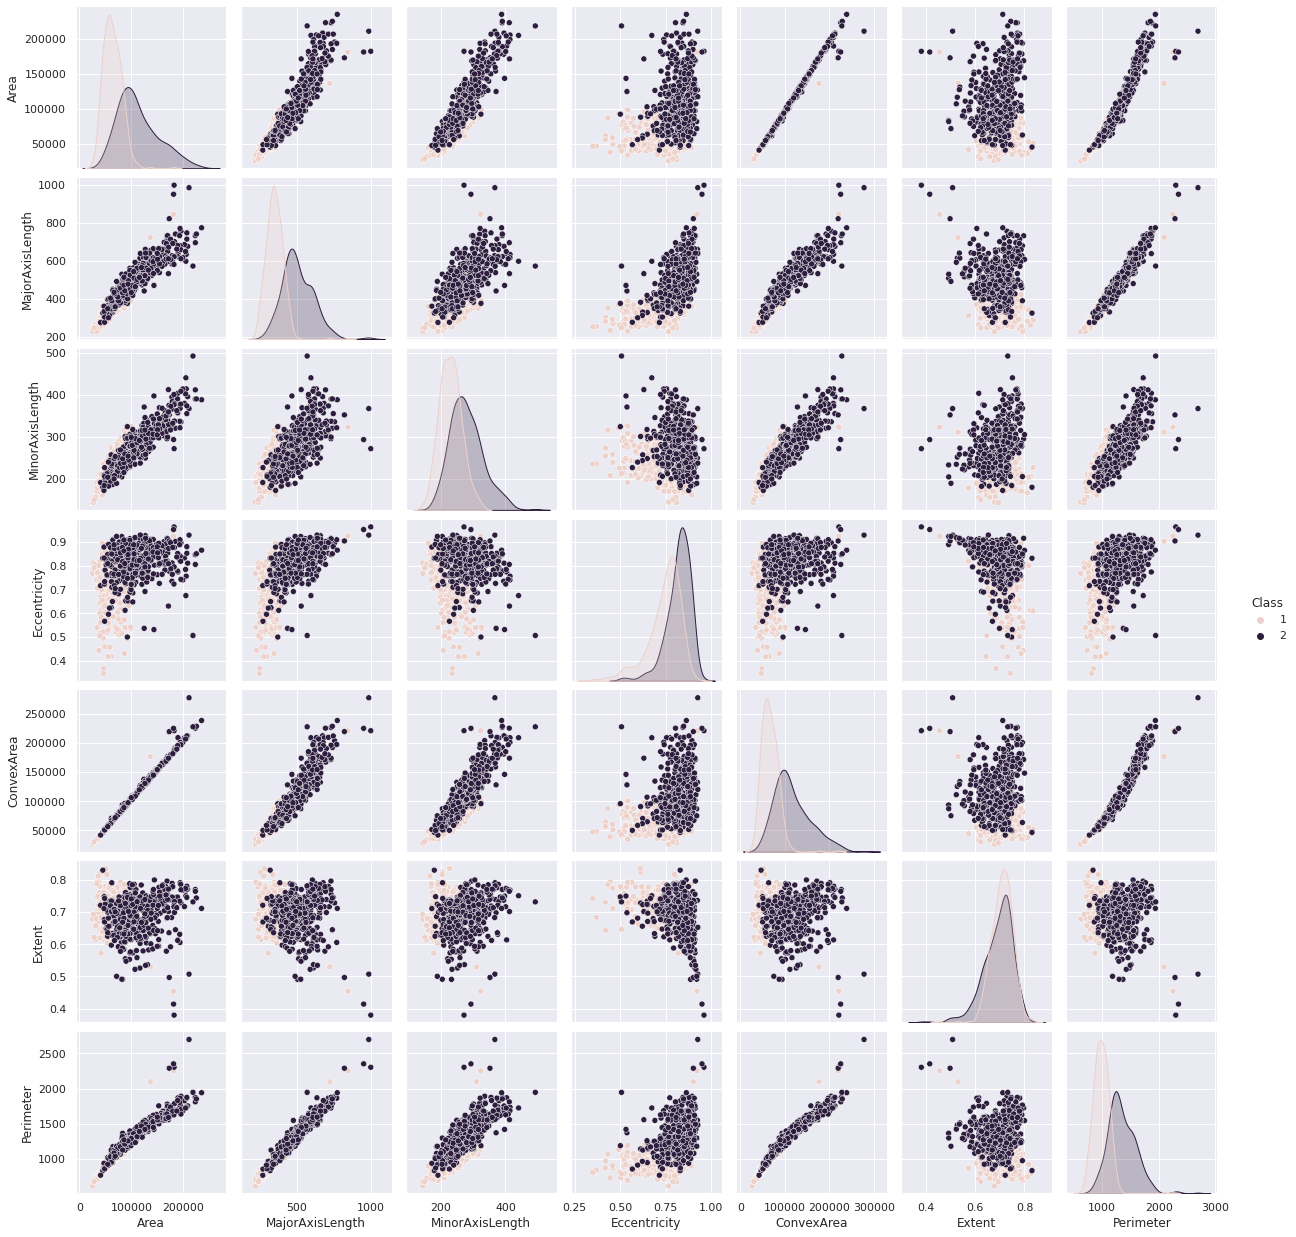

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()

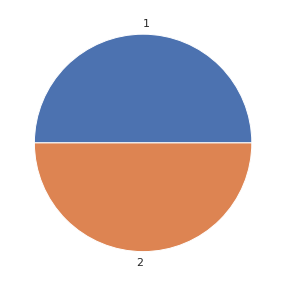

In [ ]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['Class'])
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   
5  49242       318.125407       200.122120      0.777351       51368   
6  42492       310.146072       176.131449      0.823099       43904   
7  60952       332.455472       235.429835      0.706058       62329   
8  42256       323.189607       172.575926      0.845499       44743   
9  64380       366.964842       227.771615      0.784056       66125   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  
5  0.658456    881.836  
6  0.665894    823.796  
7  0.743598    933.366  
8  0.698031    849.728  
9  0.664376    981.544

In [ ]:
X.describe().transpose()

count          mean           std           min  \
Area             900.0  87804.127778  39002.111390  25387.000000   
MajorAxisLength  900.0    430.929950    116.035121    225.629541   
MinorAxisLength  900.0    254.488133     49.988902    143.710872   
Eccentricity     900.0      0.781542      0.090318      0.348730   
ConvexArea       900.0  91186.090000  40769.290132  26139.000000   
Extent           900.0      0.699508      0.053468      0.379856   
Perimeter        900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Area             59348.000000  78902.000000  105028.250000  235047.000000  
MajorAxisLength    345.442898    407.803951     494.187014     997.291941  
MinorAxisLength    219.111126    247.848409     279.888575     492.275279  
Eccentricity         0.741766      0.798846       0.842571       0.962124  
ConvexArea       61513.250000  81651.000000  108375.750000  278217.000000  
Extent               0.670869      0.707367       0.734991       0.835455  
Perimeter          966.410750   1119.509000    1308.389750    2697.753000

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -0.007186         0.097577        -0.023958      0.423142   -0.015709   
1 -0.324217        -0.209012        -0.229292      0.224476   -0.304248   
2  0.078292         0.097758         0.236988      0.186239    0.062113   
3 -1.074286        -1.245051        -0.915273     -1.069623   -1.076165   
4 -0.215393        -0.678958         0.727354     -2.409827   -0.238623   
5 -0.989269        -0.972699        -1.088166     -0.046427   -0.977212   
6 -1.162433        -1.041504        -1.568353      0.460367   -1.160393   
7 -0.688862        -0.849133        -0.381463     -0.836226   -0.708208   
8 -1.168487        -0.929031        -1.639519      0.708518   -1.139802   
9 -0.600920        -0.551563        -0.534746      0.027845   -0.615047   

     Extent  Perimeter  
0  1.106743   0.066274  
1 -0.287777  -0.161252  
2 -1.158250   0.155945  
3  0.001711  -1.175915  
4  1.745259  -0.338639  
5 -0.768202  -1.038224  
6 -0.629029  -1.250349  
7  0.825066  -0.849891  
8 -0.027639  -1.155572  
9 -0.657433  -0.673810

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Area             900.0  8.590813e-16  1.000556 -1.601242 -0.730010 -0.228374   
MajorAxisLength  900.0  9.967336e-17  1.000556 -1.770279 -0.737144 -0.199413   
MinorAxisLength  900.0 -1.076793e-15  1.000556 -2.217269 -0.708091 -0.132898   
Eccentricity     900.0  9.029814e-16  1.000556 -4.794739 -0.440641  0.191694   
ConvexArea       900.0 -3.103999e-17  1.000556 -1.596379 -0.728228 -0.234009   
Extent           900.0  1.368288e-15  1.000556 -5.981678 -0.535921  0.147067   
Perimeter        900.0  8.049117e-17  1.000556 -1.998568 -0.729119 -0.169574   

                      75%       max  
Area             0.441866  3.777353  
MajorAxisLength  0.545458  4.883667  
MinorAxisLength  0.508404  4.759444  
Eccentricity     0.676084  2.000508  
ConvexArea       0.421867  4.590095  
Extent           0.664006  2.543983  
Perimeter        0.520748  5.598604

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

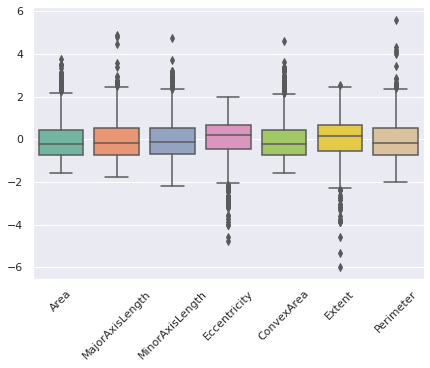

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

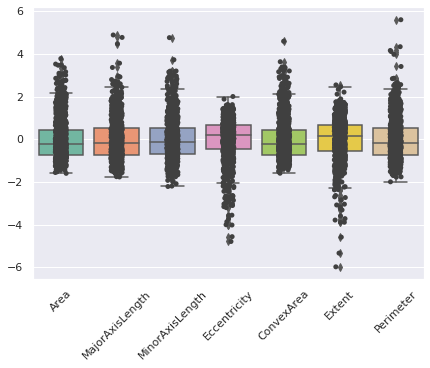

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

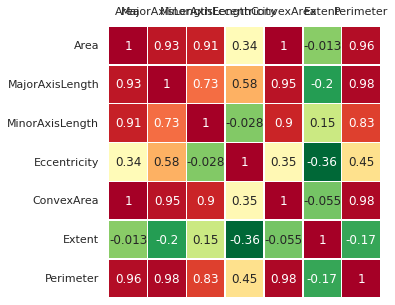

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

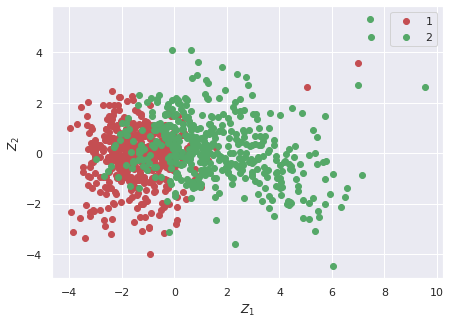

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(0)->0,  2(1)->1
idx_0 = np.where(y == 1)
idx_1 = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='r', label='1')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='g', label='2')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

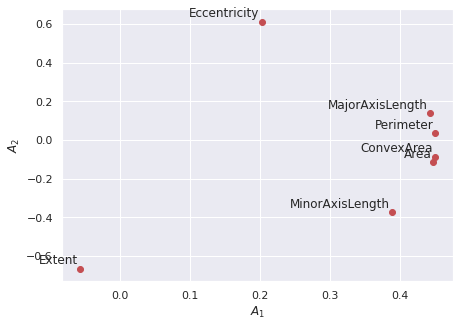

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


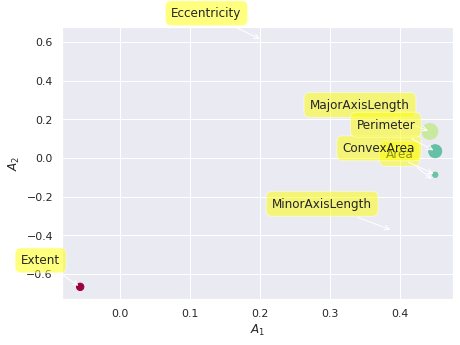

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

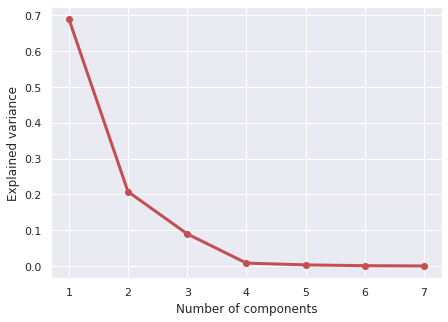

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

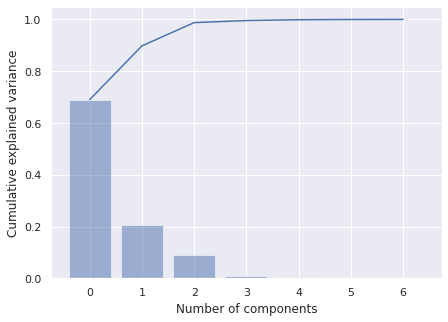

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

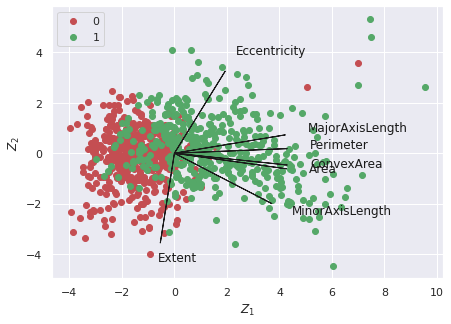

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_0,0], Z[idx_0,1], c='r', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='g', label='1')

plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=615f1b785922e6a7c6b52724a2149ac45a0a56bfbb625bdc46205fb3a6282abb
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3
0    0.076994 -0.453328 -1.089214
1   -0.475376  0.445368  0.016372
2    0.372109  0.802008  0.786487
3   -2.622445 -0.302564  0.482721
4   -0.962054 -2.967763  0.452154
..        ...       ...       ...
895 -0.114629  0.694645  0.129914
896  0.273577  0.953934  0.696489
897  0.682451 -1.308199  0.091732
898  0.648410  0.979248  0.091413
899  0.487555  2.108116 -0.191941

[900 rows x 3 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb5c87d8750>)

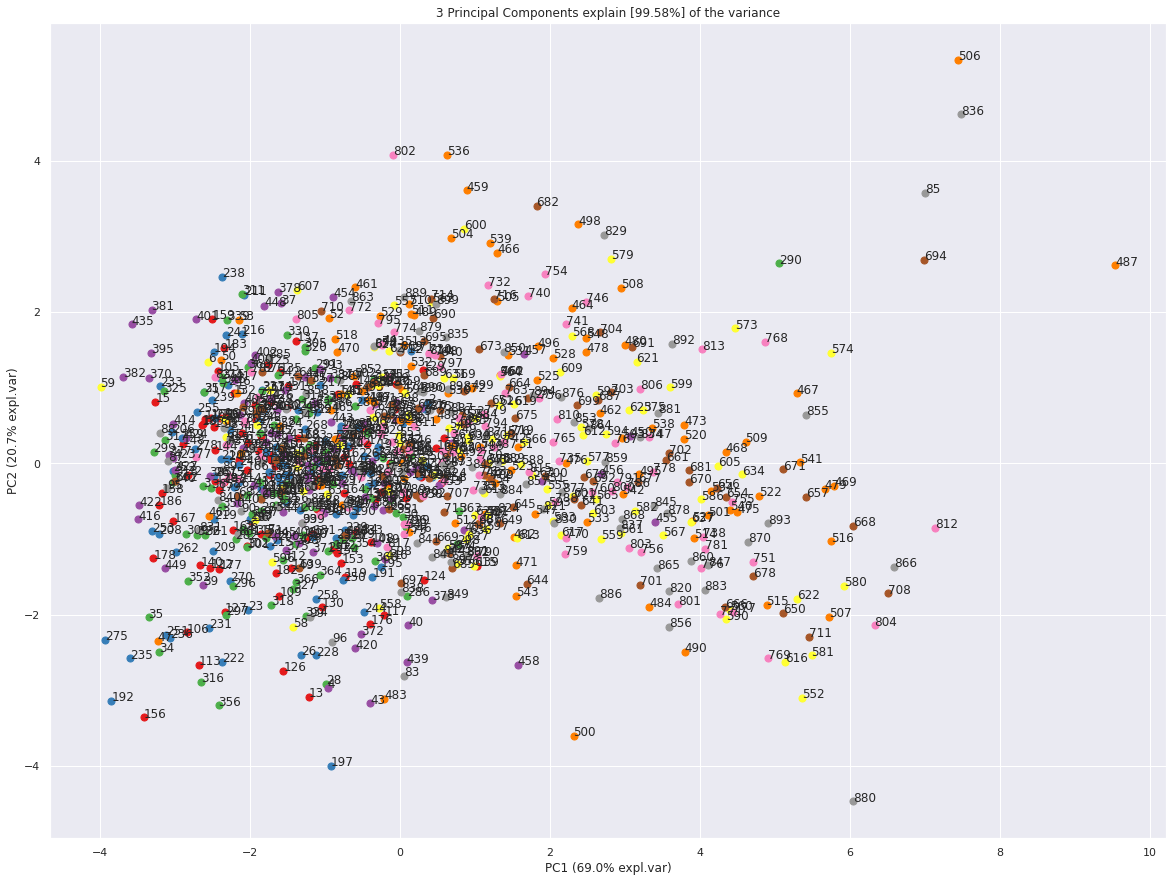

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

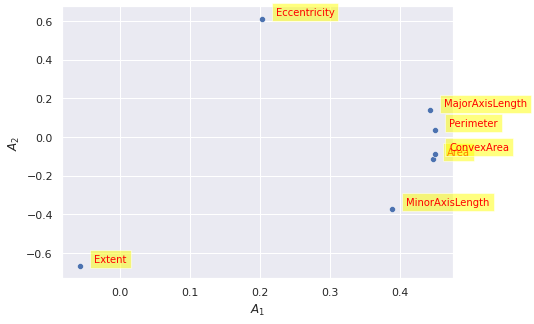

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

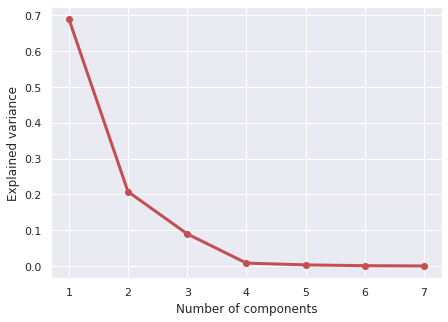

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

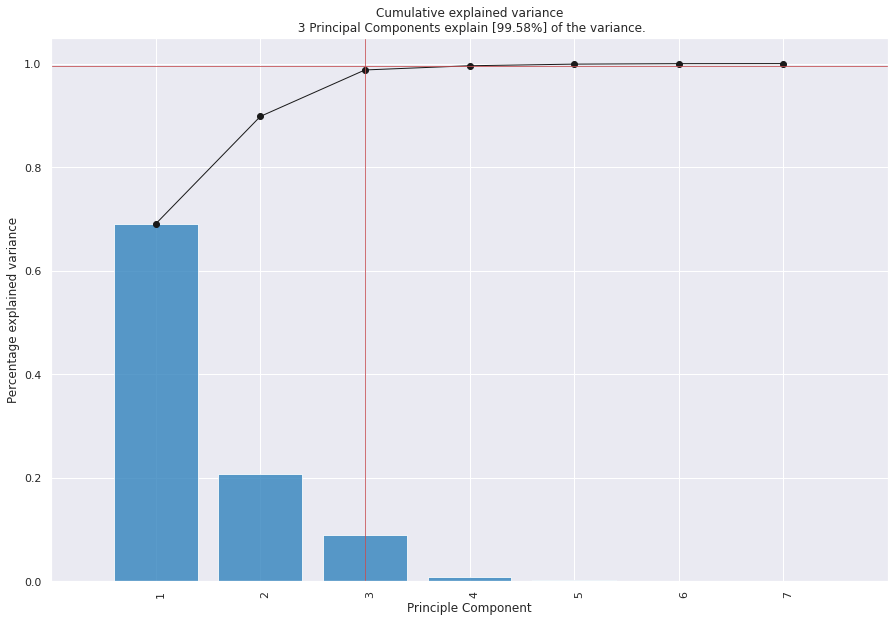

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


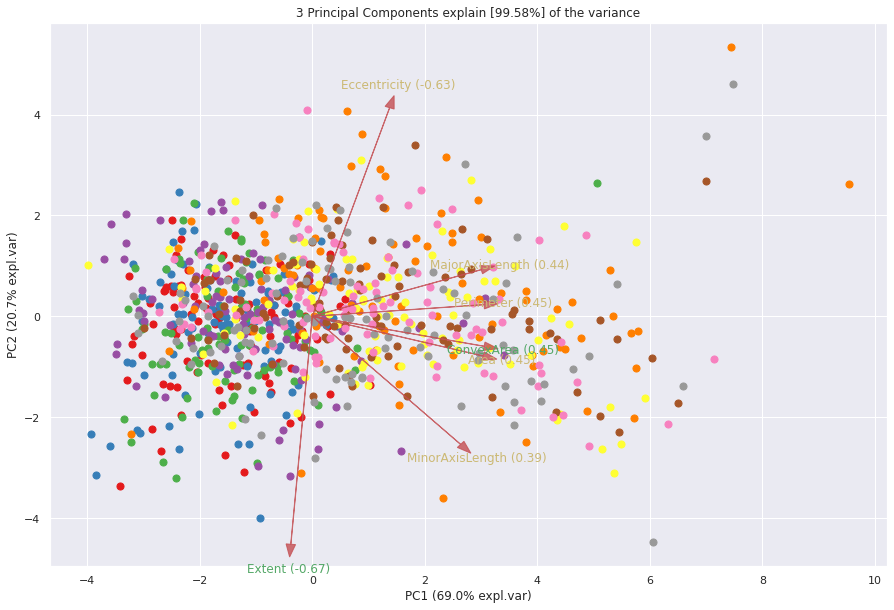

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb5ce00e2d0>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


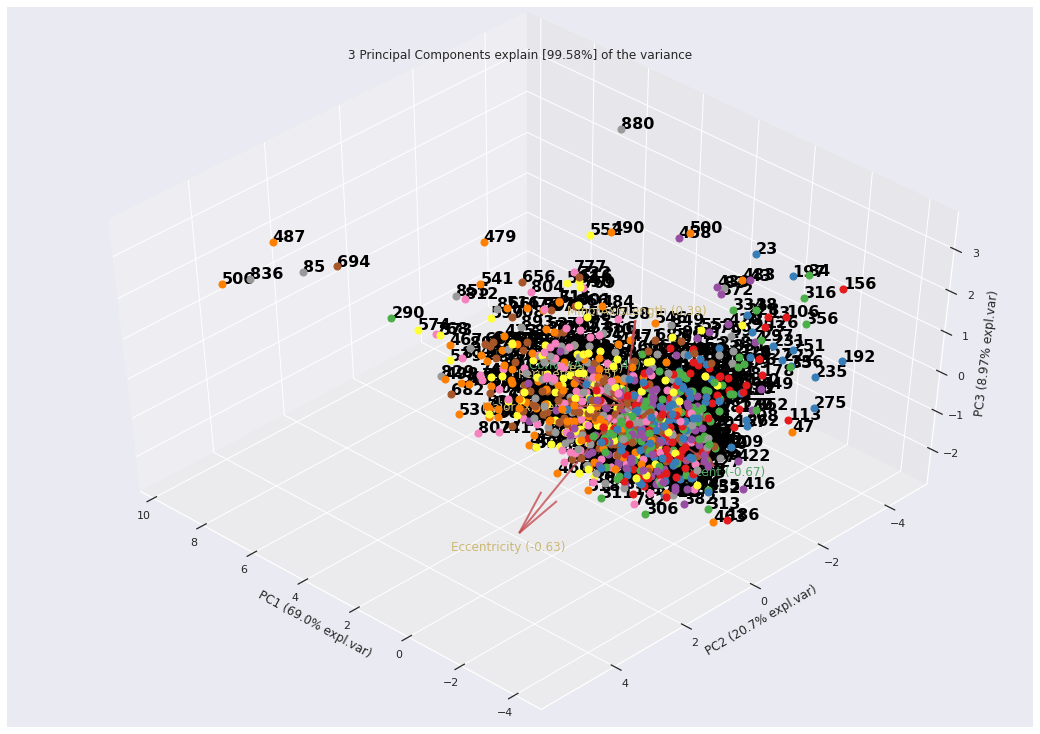

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fb5cdb55f90>)

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 44 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 44 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (810, 8)
Unseen Data For Predictions: (90, 8)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (810, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (566, 6)
12                    Transformed Test Set          (244, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              33cb
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8852  0.9384  0.9071  0.8701   
et                 Extra Trees Classifier    0.8763  0.9296  0.9143  0.8501   
rf               Random Forest Classifier    0.8693  0.9251  0.9143  0.8393   
gbc          Gradient Boosting Classifier    0.8641  0.9228  0.9036  0.8393   
lda          Linear Discriminant Analysis    0.8623  0.9286  0.8643  0.8610   
ridge                    Ridge Classifier    0.8605  0.0000  0.8750  0.8516   
qda       Quadratic Discriminant Analysis    0.8603  0.9246  0.9179  0.8239   
lightgbm  Light Gradient Boosting Machine    0.8568  0.9227  0.8858  0.8364   
ada                  Ada Boost Classifier    0.8534  0.9106  0.8786  0.8351   
nb                            Naive Bayes    0.8377  0.9099  0.9143  0.7916   
knn                K Neighbors Classifier    0.8146  0.8654  0.8429  0.7974   
dt               Decision Tree Classifier    0.8075  0.8074  0.7936  0.8162   
svm                   SVM - Linear Kernel    0.5105  0.0000  0.1107  0.1509   
dummy                    Dummy Classifier    0.5035  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8870  0.7704  0.7736     0.354  
et        0.8800  0.7528  0.7572     0.470  
rf        0.8742  0.7387  0.7439     0.536  
gbc       0.8683  0.7282  0.7346     0.131  
lda       0.8611  0.7245  0.7274     0.018  
ridge     0.8611  0.7210  0.7251     0.016  
qda       0.8675  0.7209  0.7273     0.017  
lightgbm  0.8598  0.7136  0.7160     0.099  
ada       0.8555  0.7069  0.7097     0.125  
nb        0.8480  0.6757  0.6854     0.018  
knn       0.8178  0.6294  0.6334     0.116  
dt        0.8037  0.6148  0.6166     0.018  
svm       0.0868  0.0109  0.0240     0.017  
dummy     0.0000  0.0000  0.0000     0.018

In [ ]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.7888  0.7500  0.8077  0.7778  0.5783  0.5797
1       0.8070  0.8073  0.8214  0.7931  0.8070  0.6142  0.6145
2       0.8246  0.8245  0.8214  0.8214  0.8214  0.6490  0.6490
3       0.8070  0.8067  0.7857  0.8148  0.8000  0.6137  0.6141
4       0.7895  0.7894  0.7857  0.7857  0.7857  0.5788  0.5788
5       0.7895  0.7894  0.7931  0.7931  0.7931  0.5788  0.5788
6       0.8036  0.8036  0.7500  0.8400  0.7925  0.6071  0.6107
7       0.8036  0.8036  0.8571  0.7742  0.8136  0.6071  0.6107
8       0.8571  0.8571  0.7857  0.9167  0.8462  0.7143  0.7217
9       0.8036  0.8036  0.7857  0.8148  0.8000  0.6071  0.6075
Mean    0.8075  0.8074  0.7936  0.8162  0.8037  0.6148  0.6166
SD      0.0194  0.0195  0.0310  0.0381  0.0187  0.0389  0.0406

In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.8264  0.9286  0.7647  0.8387  0.6503  0.6651
1       0.8947  0.8953  0.9286  0.8667  0.8966  0.7897  0.7916
2       0.8246  0.8251  0.8571  0.8000  0.8276  0.6494  0.6510
3       0.8246  0.8264  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8596  0.8602  0.8929  0.8333  0.8621  0.7196  0.7213
5       0.9123  0.9107  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8750  0.8750  0.8929  0.8621  0.8772  0.7500  0.7505
7       0.8393  0.8393  0.8929  0.8065  0.8475  0.6786  0.6825
8       0.9464  0.9464  1.0000  0.9032  0.9492  0.8929  0.8980
9       0.8393  0.8393  0.8214  0.8519  0.8364  0.6786  0.6790
Mean    0.8640  0.8644  0.9143  0.8306  0.8694  0.7283  0.7341
SD      0.0401  0.0396  0.0535  0.0433  0.0388  0.0799  0.0796

In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.8362  0.8214  0.7667  0.7931  0.5793  0.5808
1       0.8070  0.8411  0.8571  0.7742  0.8136  0.6146  0.6181
2       0.8421  0.9033  0.8571  0.8276  0.8421  0.6843  0.6847
3       0.7368  0.8282  0.7857  0.7097  0.7458  0.4745  0.4771
4       0.7193  0.7599  0.7500  0.7000  0.7241  0.4391  0.4402
5       0.9123  0.9452  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.7321  0.8125  0.7500  0.7241  0.7368  0.4643  0.4646
7       0.8750  0.9018  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.8393  0.9043  0.7500  0.9130  0.8235  0.6786  0.6897
9       0.8929  0.9216  0.9286  0.8667  0.8966  0.7857  0.7877
Mean    0.8146  0.8654  0.8429  0.7974  0.8178  0.6294  0.6334
SD      0.0658  0.0553  0.0833  0.0692  0.0653  0.1313  0.1338

**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7544  0.8282  0.8214  0.7188  0.7667  0.5098  0.5149
1       0.8070  0.9002  0.8214  0.7931  0.8070  0.6142  0.6145
2       0.7368  0.8676  0.7143  0.7407  0.7273  0.4732  0.4735
3       0.7719  0.8596  0.8571  0.7273  0.7869  0.5451  0.5537
4       0.7544  0.8177  0.7857  0.7333  0.7586  0.5092  0.5105
5       0.8772  0.9667  1.0000  0.8056  0.8923  0.7532  0.7773
6       0.8393  0.8897  0.8571  0.8276  0.8421  0.6786  0.6790
7       0.8750  0.9254  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.8929  0.9509  0.9286  0.8667  0.8966  0.7857  0.7877
9       0.8393  0.8922  0.8929  0.8065  0.8475  0.6786  0.6825
Mean    0.8148  0.8898  0.8607  0.7858  0.8206  0.6298  0.6348
SD      0.0548  0.0463  0.0773  0.0497  0.0571  0.1094  0.1118

**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8682  0.8214  0.8519  0.8364  0.6839  0.6843
1       0.8947  0.9421  0.9286  0.8667  0.8966  0.7897  0.7916
2       0.8947  0.9631  0.8571  0.9231  0.8889  0.7891  0.7911
3       0.8246  0.9212  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8947  0.9323  0.9286  0.8667  0.8966  0.7897  0.7916
5       0.9474  0.9717  1.0000  0.9062  0.9508  0.8945  0.8995
6       0.8393  0.9298  0.8571  0.8276  0.8421  0.6786  0.6790
7       0.8750  0.9439  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.9464  0.9783  0.9286  0.9630  0.9455  0.8929  0.8934
9       0.8929  0.9337  0.8929  0.8929  0.8929  0.7857  0.7857
Mean    0.8852  0.9384  0.9071  0.8701  0.8870  0.7704  0.7736
SD      0.0396  0.0295  0.0484  0.0525  0.0383  0.0790  0.0777

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8682  0.8214  0.8519  0.8364  0.6839  0.6843
1       0.9123  0.9421  0.9643  0.8710  0.9153  0.8248  0.8294
2       0.8947  0.9618  0.8571  0.9231  0.8889  0.7891  0.7911
3       0.8246  0.9212  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8947  0.9323  0.9286  0.8667  0.8966  0.7897  0.7916
5       0.9474  0.9717  1.0000  0.9062  0.9508  0.8945  0.8995
6       0.8393  0.9298  0.8571  0.8276  0.8421  0.6786  0.6790
7       0.8750  0.9439  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.9464  0.9783  0.9286  0.9630  0.9455  0.8929  0.8934
9       0.8929  0.9349  0.8929  0.8929  0.8929  0.7857  0.7857
Mean    0.8869  0.9384  0.9107  0.8706  0.8888  0.7740  0.7774
SD      0.0404  0.0294  0.0511  0.0524  0.0391  0.0806  0.0794

**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8070  0.8885  0.8214  0.7931  0.8070  0.6142  0.6145
1       0.8947  0.9132  0.9286  0.8667  0.8966  0.7897  0.7916
2       0.9123  0.9711  0.8929  0.9259  0.9091  0.8244  0.8249
3       0.8246  0.8775  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8596  0.9175  0.9286  0.8125  0.8667  0.7199  0.7271
5       0.8947  0.9489  1.0000  0.8286  0.9062  0.7886  0.8069
6       0.8929  0.9490  0.9286  0.8667  0.8966  0.7857  0.7877
7       0.8750  0.9145  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.9107  0.9815  0.9286  0.8966  0.9123  0.8214  0.8220
9       0.8214  0.8897  0.8571  0.8000  0.8276  0.6429  0.6445
Mean    0.8693  0.9251  0.9143  0.8393  0.8742  0.7387  0.7439
SD      0.0370  0.0341  0.0457  0.0473  0.0357  0.0738  0.0735

**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8070  0.8639  0.8214  0.7931  0.8070  0.6142  0.6145
1       0.8772  0.9212  0.9286  0.8387  0.8814  0.7548  0.7590
2       0.9123  0.9594  0.8929  0.9259  0.9091  0.8244  0.8249
3       0.8246  0.9224  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8947  0.9113  0.9643  0.8438  0.9000  0.7899  0.7978
5       0.9123  0.9643  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8750  0.9362  0.8929  0.8621  0.8772  0.7500  0.7505
7       0.8750  0.9235  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.9286  0.9796  0.9286  0.9286  0.9286  0.8571  0.8571
9       0.8393  0.8827  0.8929  0.8065  0.8475  0.6786  0.6825
Mean    0.8746  0.9264  0.9179  0.8455  0.8791  0.7493  0.7543
SD      0.0381  0.0340  0.0453  0.0496  0.0365  0.0759  0.0755

**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8682  0.8214  0.8519  0.8364  0.6839  0.6843
1       0.9123  0.9421  0.9643  0.8710  0.9153  0.8248  0.8294
2       0.8947  0.9618  0.8571  0.9231  0.8889  0.7891  0.7911
3       0.8246  0.9212  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8947  0.9323  0.9286  0.8667  0.8966  0.7897  0.7916
5       0.9474  0.9717  1.0000  0.9062  0.9508  0.8945  0.8995
6       0.8393  0.9298  0.8571  0.8276  0.8421  0.6786  0.6790
7       0.8750  0.9439  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.9464  0.9783  0.9286  0.9630  0.9455  0.8929  0.8934
9       0.8929  0.9349  0.8929  0.8929  0.8929  0.7857  0.7857
Mean    0.8869  0.9384  0.9107  0.8706  0.8888  0.7740  0.7774
SD      0.0404  0.0294  0.0511  0.0524  0.0391  0.0806  0.0794

In [ ]:
tuned_best_model

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (810, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (566, 3)
12                    Transformed Test Set          (244, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              73f1
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.8604  0.9060  0.9107  0.8263   
lr                    Logistic Regression    0.8570  0.9206  0.8714  0.8472   
ridge                    Ridge Classifier    0.8569  0.0000  0.9179  0.8175   
lda          Linear Discriminant Analysis    0.8569  0.9213  0.9179  0.8175   
lightgbm  Light Gradient Boosting Machine    0.8553  0.9056  0.8828  0.8372   
nb                            Naive Bayes    0.8552  0.9199  0.9179  0.8142   
ada                  Ada Boost Classifier    0.8517  0.9077  0.8895  0.8273   
qda       Quadratic Discriminant Analysis    0.8463  0.9112  0.9071  0.8092   
rf               Random Forest Classifier    0.8429  0.9069  0.8858  0.8157   
gbc          Gradient Boosting Classifier    0.8412  0.9094  0.8680  0.8235   
et                 Extra Trees Classifier    0.8357  0.9171  0.8717  0.8159   
svm                   SVM - Linear Kernel    0.8184  0.0000  0.7980  0.8293   
dt               Decision Tree Classifier    0.8007  0.8004  0.7900  0.8076   
dummy                    Dummy Classifier    0.5035  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
knn       0.8661  0.7211  0.7255     0.122  
lr        0.8572  0.7139  0.7179     0.022  
ridge     0.8641  0.7142  0.7212     0.016  
lda       0.8641  0.7142  0.7212     0.018  
lightgbm  0.8583  0.7107  0.7137     0.052  
nb        0.8626  0.7107  0.7171     0.017  
ada       0.8561  0.7036  0.7076     0.123  
qda       0.8540  0.6930  0.7011     0.018  
rf        0.8481  0.6859  0.6909     0.531  
gbc       0.8439  0.6824  0.6858     0.114  
et        0.8412  0.6716  0.6763     0.473  
svm       0.8081  0.6367  0.6430     0.017  
dt        0.7951  0.6010  0.6052     0.018  
dummy     0.0000  0.0000  0.0000     0.016

In [ ]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9002  0.9286  0.7879  0.8525  0.6851  0.6958
1       0.8772  0.8904  0.8929  0.8621  0.8772  0.7545  0.7549
2       0.8772  0.9655  0.8929  0.8621  0.8772  0.7545  0.7549
3       0.8070  0.9317  0.9286  0.7429  0.8254  0.6156  0.6349
4       0.8596  0.8849  0.8929  0.8333  0.8621  0.7196  0.7213
5       0.9298  0.9446  1.0000  0.8788  0.9355  0.8593  0.8679
6       0.8393  0.9082  0.8929  0.8065  0.8475  0.6786  0.6825
7       0.8929  0.9267  0.9286  0.8667  0.8966  0.7857  0.7877
8       0.9286  0.9528  0.9643  0.9000  0.9310  0.8571  0.8593
9       0.8571  0.9184  0.8929  0.8333  0.8621  0.7143  0.7161
Mean    0.8711  0.9223  0.9214  0.8373  0.8767  0.7424  0.7475
SD      0.0369  0.0255  0.0350  0.0448  0.0336  0.0733  0.0707

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.